In [1]:
import os,sys
import scanpy as sc
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import anndata
import warnings
warnings.filterwarnings('ignore', category=anndata.ImplicitModificationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
# sys.path.insert(
#     0,
#     '/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/script/spatial_pipeline/lib/utils'
# )
from STutils.pl import getDefaultColors
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.serif'] = ['Arial']
sc.settings.set_figure_params(dpi=100,dpi_save=300,frameon=False,facecolor='white',fontsize=12,vector_friendly=True,figsize=(3,3))
sc._settings.ScanpyConfig(figdir='./',n_jobs=30)

In [2]:
# 样本编号对应信息
import yaml
with open('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/sample.yaml', 'r') as file:
    sample_dict = yaml.safe_load(file)
# 样本列表
samplelist = [
    "SS200000148TR_D1", "SS200000118TL_C1", "SS200000131TR_C4",
    "SS200000133TL_C4", "SS200000148TR_E6", "SS200000495BR_B1",
    "SS200000495BR_B2", "SS200000495BR_B5", "SS200000495BR_C5",
    "SS200000495BR_D5", "SS200000495BR_E3"
]

In [3]:
od = '/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/PDAC/spatial/cellbin_v3/7.10_scRNA_ADM_DEGs'
os.makedirs(od, exist_ok=True)
os.chdir(od)

In [4]:
adata = sc.read('/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/project/yixianai/SC_reanalysis/result/3_cluster/Epithelial/seurat_obj.h5ad')


In [6]:
rename_dict = {
    "Duct1_NTRK2_NMF_2": "Duct_NTRK2",
    "Acinar_NMF_8": "Acinar_NMF_8",
    "Duct_MMP7_NMF_10": "Duct_MMP7",
    "Acinar_REG3G_NMF_14": "Acinar_REG3G",
    "Duct2_CEACAM6_NMF_7": "Duct_like_CEACAM6",
    "Acinar_NMF_15": "Acinar_NMF_15",
    "Acinar_RBPJL_NMF_11": "Acinar_RBPJL",
    "Endocrine_NMF_12": "Endocrine",
    "Duct_FTH1_NMF_6": "Duct_FTH1",
    "Duct_FOSB_NMF_5": "Duct_FOSB",
}
adata.obs["cellsubtype"] = adata.obs["cellsubtype"].map(rename_dict)
adata.obs["cellsubtype"].value_counts()
# sort adata.obs["cellsubtype"] by character
adata.obs["cellsubtype"] = pd.Categorical(
    adata.obs["cellsubtype"],
    categories=sorted(adata.obs["cellsubtype"].unique()),
    ordered=True,
)

In [9]:
adata.write('adata_Epi.h5ad')

In [10]:
n_cluster = adata.obs['cellsubtype'].unique().shape[0]
color_palette = getDefaultColors(n_cluster,type = 9)
sc.settings.set_figure_params(dpi=100,dpi_save=300,frameon=False,facecolor='white',fontsize=13,vector_friendly=True,figsize=(5,5))
sc.pl.umap(adata, color=['cellsubtype'],palette=color_palette, show=False, save='scRNA_umap_celltype_Epi.pdf',legend_loc='on data',legend_fontsize=12)

/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/scanpy/scanpy/plotting/_tools/scatterplots.py:396: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


<Axes: title={'center': 'cellsubtype'}, xlabel='UMAP1', ylabel='UMAP2'>

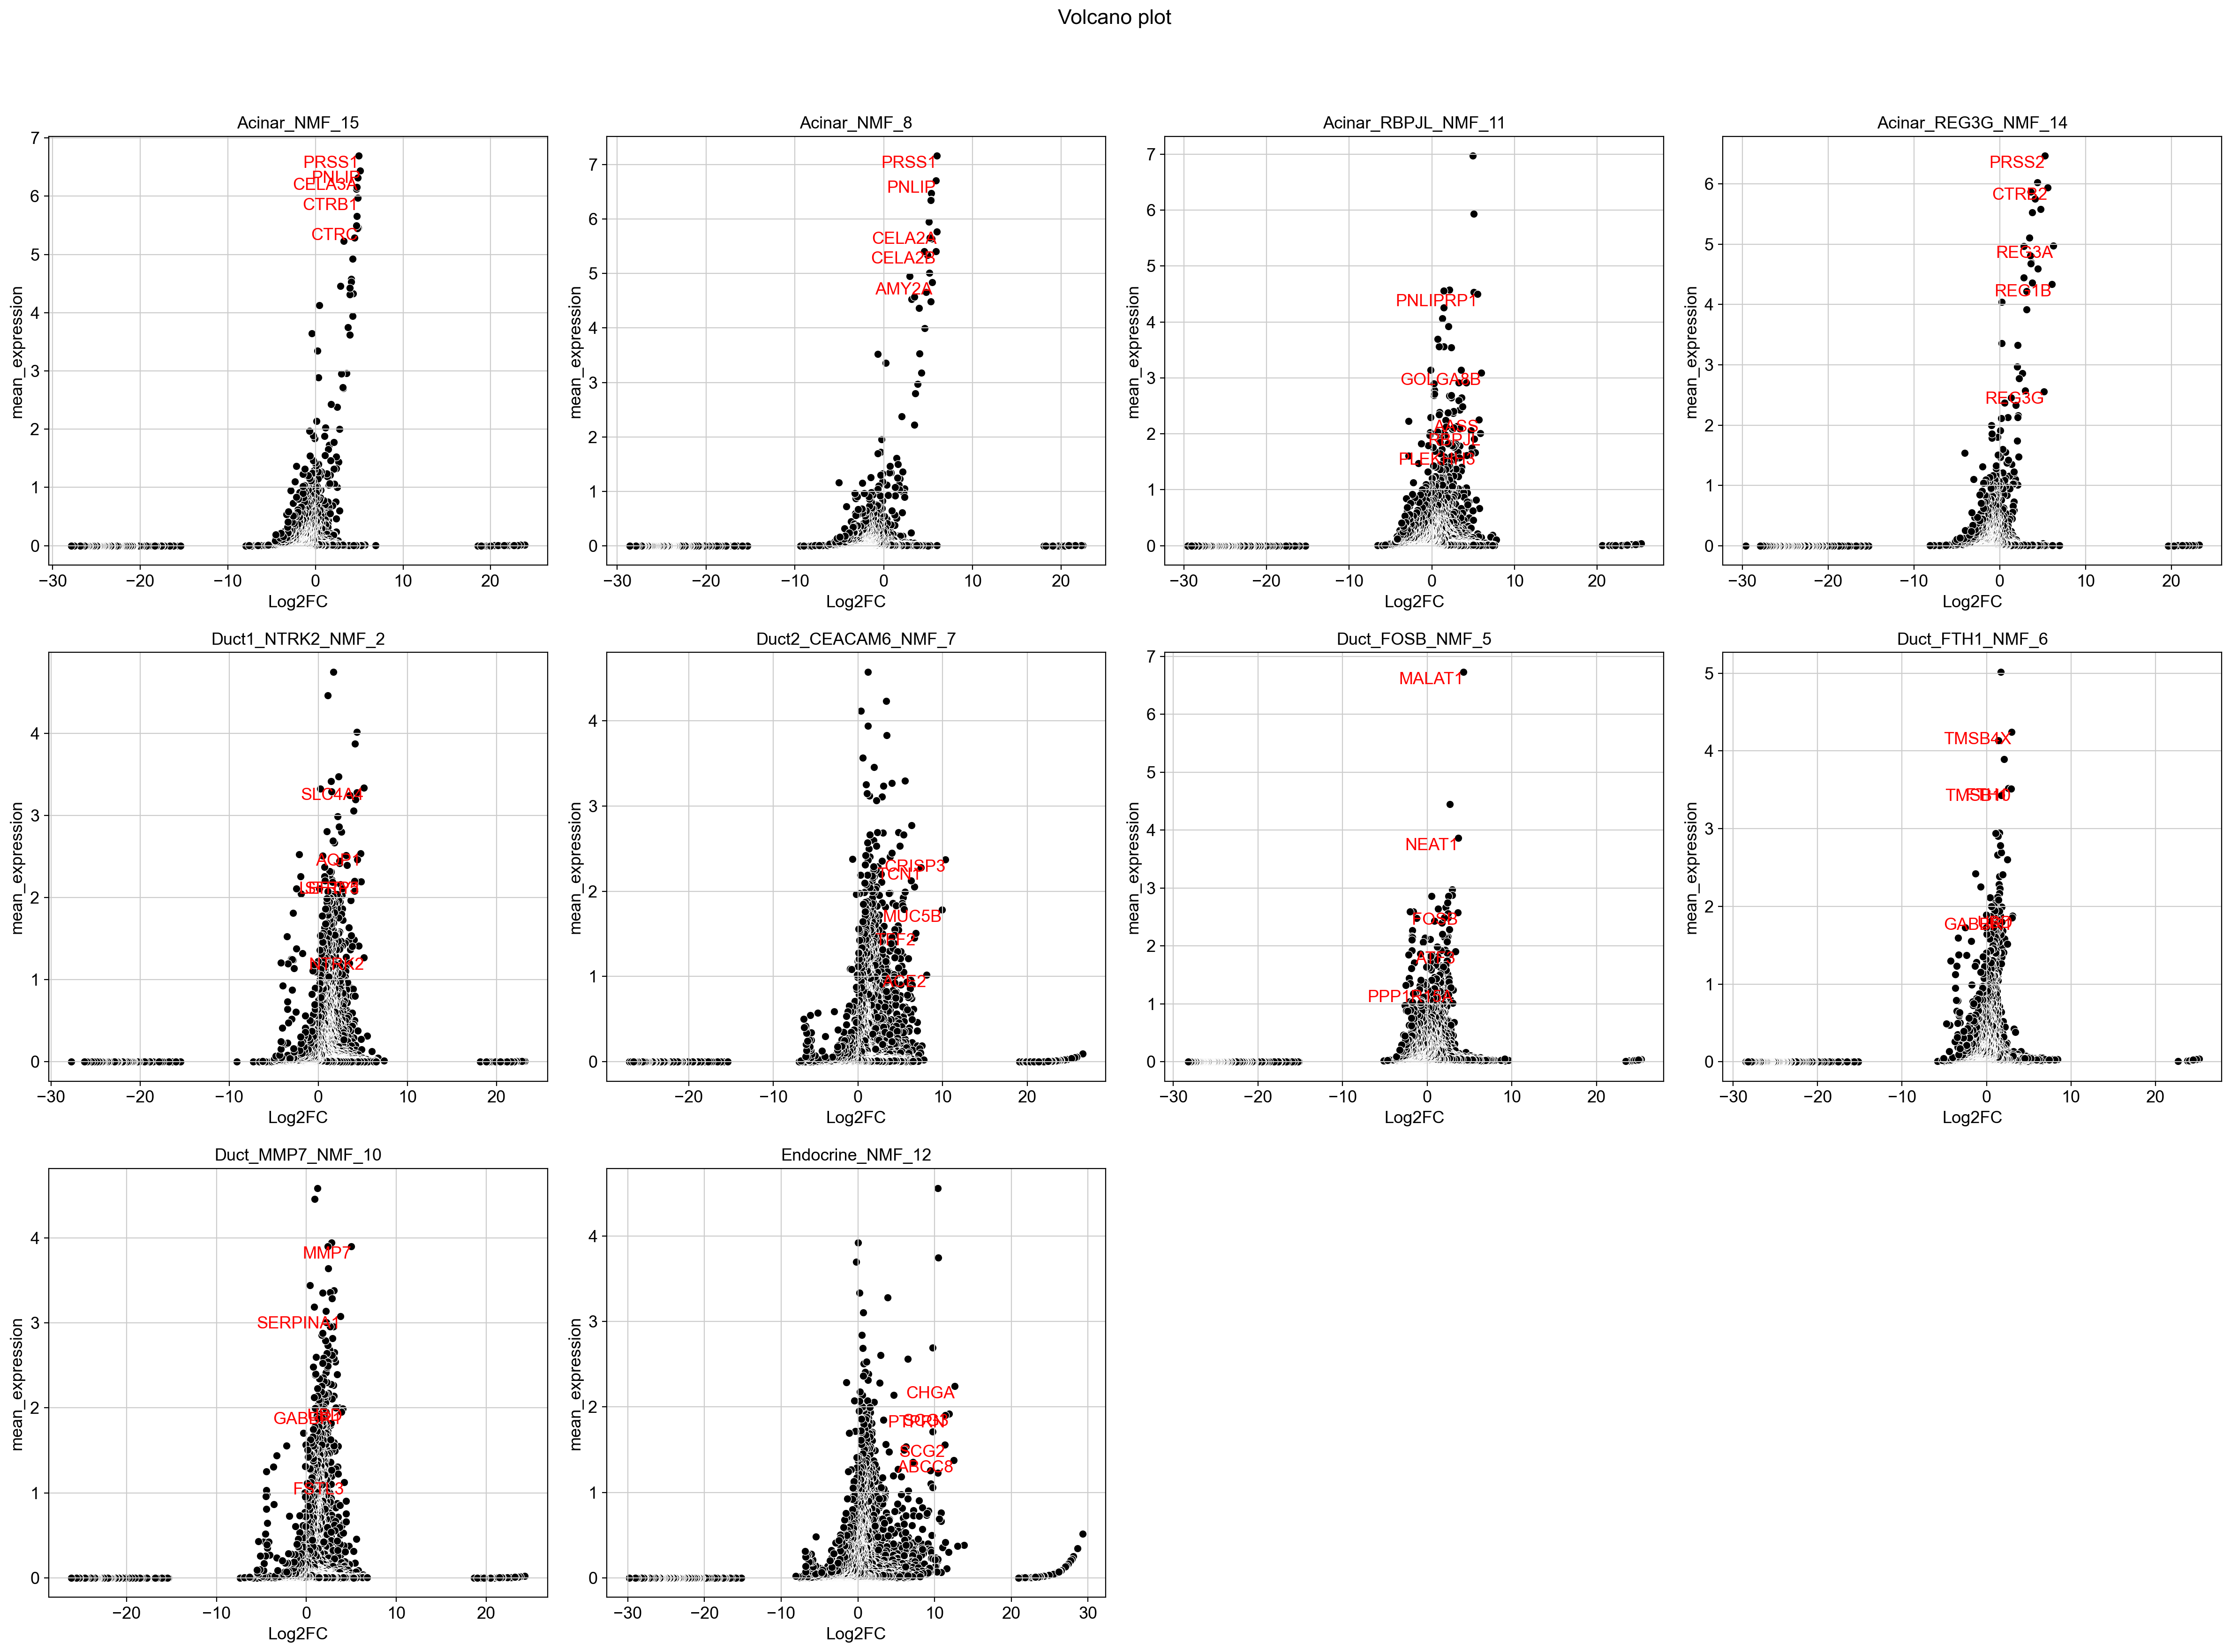

In [15]:
sc.tl.rank_genes_groups(adata,
                        'cellsubtype',
                        method='wilcoxon',
                        use_raw=False,
                        # layer='norm',
                        key_added='rank_genes_groups')
DEG_dict = getDEG(adata,
                    'cellsubtype',
                    qval_cutoff=0.05,
                    mean_expr_cutoff=1,
                #   layer='norm',
                    top_genes=5,
                    save=f'DEG_volcano.png')

In [16]:
DEG_dict

OrderedDict([('Acinar_NMF_15', ['PNLIP', 'PRSS1', 'CTRC', 'CTRB1', 'CELA3A']),
             ('Acinar_NMF_8', ['PRSS1', 'CELA2A', 'CELA2B', 'PNLIP', 'AMY2A']),
             ('Acinar_RBPJL_NMF_11',
              ['GOLGA8B', 'RBPJL', 'AASS', 'PNLIPRP1', 'PLEKHH3']),
             ('Acinar_REG3G_NMF_14',
              ['REG3A', 'REG1B', 'CTRB2', 'PRSS2', 'REG3G']),
             ('Duct1_NTRK2_NMF_2',
              ['NTRK2', 'SLC4A4', 'LEFTY1', 'AQP1', 'SFRP5']),
             ('Duct2_CEACAM6_NMF_7',
              ['CRISP3', 'MUC5B', 'ACE2', 'TCN1', 'TFF2']),
             ('Duct_FOSB_NMF_5',
              ['MALAT1', 'NEAT1', 'FOSB', 'ATF3', 'PPP1R15A']),
             ('Duct_FTH1_NMF_6',
              ['UBD', 'GABBR1', 'TMSB4X', 'TMSB10', 'FTH1']),
             ('Duct_MMP7_NMF_10',
              ['MMP7', 'FSTL3', 'UBD', 'GABBR1', 'SERPINA1']),
             ('Endocrine_NMF_12', ['CHGA', 'ABCC8', 'SCG3', 'PTPRN', 'SCG2'])])

/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/scanpy/scanpy/plotting/_dotplot.py:747: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/scanpy/scanpy/plotting/_utils.py:292: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  pl.savefig(filename, dpi=dpi, bbox_inches='tight')
/jdfsbjcas1/ST_BJ/P21H28400N0232/gongchanghao/software/miniconda/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


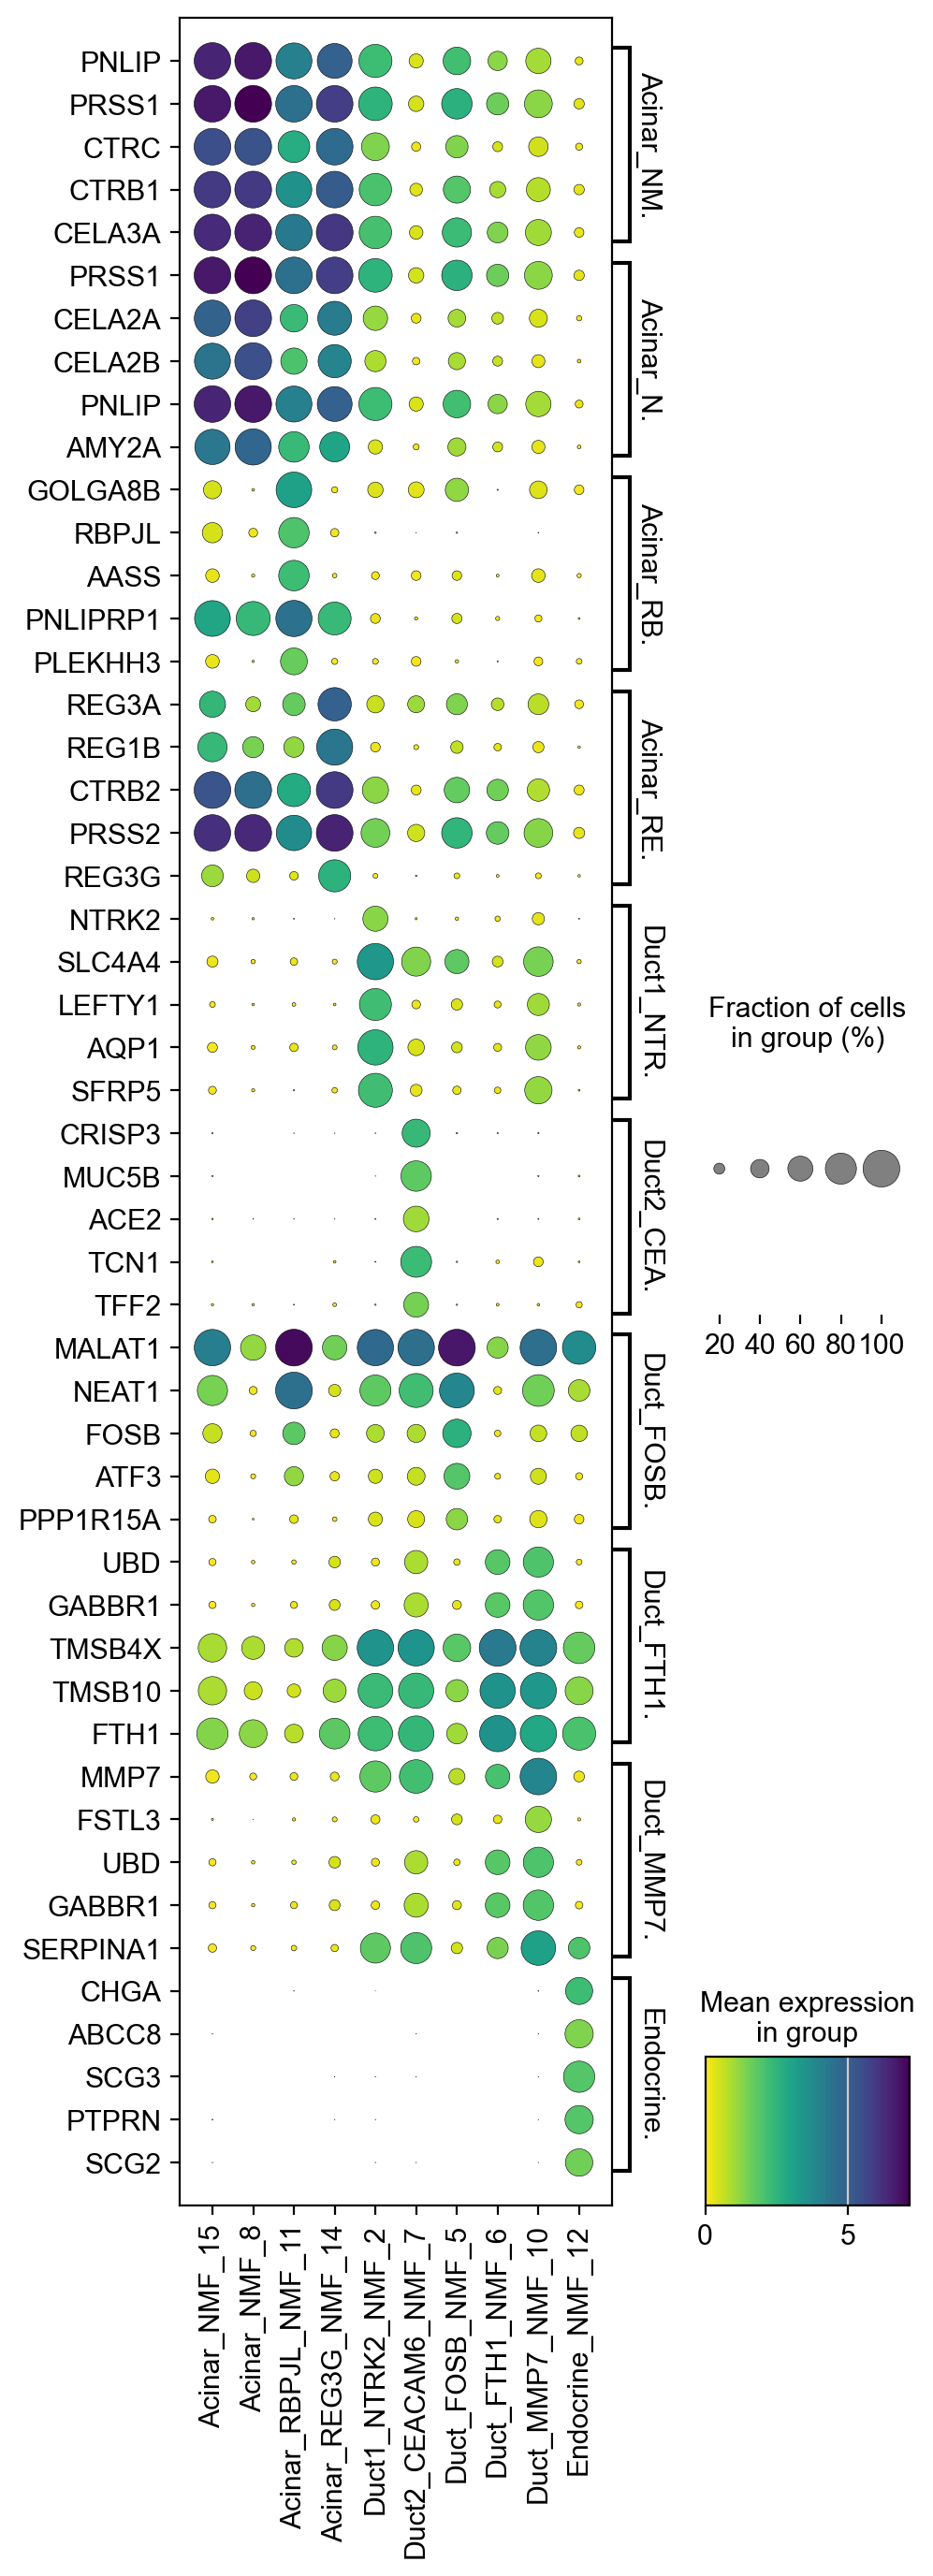

In [21]:
# adata.obs['cellsubtype'] = pd.Categorical(adata.obs['cellsubtype'], categories=sorted(adata.obs['cellsubtype'].unique()))
sc.pl.dotplot(adata, DEG_dict, groupby='cellsubtype',cmap='viridis_r',swap_axes=True,save='scRNA_DEG_dotplot_Epi.pdf',figsize=(5,15))